In [1]:
import DHN
import random

## Basic example

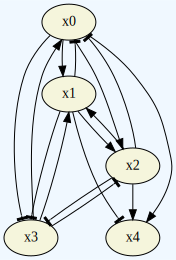

In [2]:
# Define network
net_spec = """x0 : -x1 - x2 + x3 : E
              x1 : x0 + x2 + x3  : E
              x2 : x0 + x1 - x3  : E
              x3 : -x0 - x1 - x2 : E
              x4 : x0 - x1 + x2  : E"""

network = DHN.Network(net_spec)

DHN.DrawGraph(network)

In [3]:
# Grid size
network.domains()

[2, 2, 2, 2, 2]

In [4]:
# Inputs to each node
[network.inputs(d) for d in range(network.size())]

[[1, 2, 3], [0, 2, 3], [3, 0, 1], [0, 1, 2], [1, 0, 2]]

In [5]:
# Outputs to each node
[network.outputs(d) for d in range(network.size())]

[[1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 3, 4], [0, 1, 2], []]

In [6]:
# Make parameter graph
parameter_graph = DHN.ParameterGraph(network)

print('Number of parameters:', parameter_graph.size())

Number of parameters: 59049


In [7]:
# Pick a parameter
par_index = 138

parameter = parameter_graph.parameter(par_index)

In [8]:
# make domain graph (STG)
domain_graph = DHN.DomainGraph(parameter)

# DHN.DrawGraph(domain_graph)

In [9]:
# Compute Morse graph
morse_graph = DHN.MorseGraph(domain_graph)

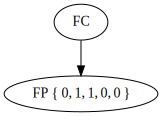

In [10]:
DHN.DrawGraph(morse_graph)

In [11]:
# Print parameter info
print(parameter.partialorders())

x0 : (p0, p1, p2, p3, p7, t0, p4, p5, p6)
x1 : (p0, p1, p4, t0, p2, p3, p5, p6, p7)
x2 : (p0, p1, p3, p5, p7, t0, p2, p4, p6)
x3 : (p1, p2, p3, p4, p5, p6, p7, t0, p0)
x4 : (p0, p1, p2, p3, p4, p5, p7, t0, p6)


In [12]:
# Input polynomials for node 0
node = 0

num_input_p = 2**len(network.inputs(node))

for j in range(num_input_p):
    print(parameter.input_polynomial(j, node))

p0 = b[x0]
p1 =  - W[x1->x0] + b[x0]
p2 =  - W[x2->x0] + b[x0]
p3 =  - W[x1->x0] - W[x2->x0] + b[x0]
p4 = W[x3->x0] + b[x0]
p5 =  - W[x1->x0] + W[x3->x0] + b[x0]
p6 =  - W[x2->x0] + W[x3->x0] + b[x0]
p7 =  - W[x1->x0] - W[x2->x0] + W[x3->x0] + b[x0]


In [13]:
# Input polynomials for node 1
node = 1

num_input_p = 2**len(network.inputs(node))

for j in range(num_input_p):
    print(parameter.input_polynomial(j, node))

p0 = b[x1]
p1 = W[x0->x1] + b[x1]
p2 = W[x2->x1] + b[x1]
p3 = W[x0->x1] + W[x2->x1] + b[x1]
p4 = W[x3->x1] + b[x1]
p5 = W[x0->x1] + W[x3->x1] + b[x1]
p6 = W[x2->x1] + W[x3->x1] + b[x1]
p7 = W[x0->x1] + W[x2->x1] + W[x3->x1] + b[x1]


## Search for stable full cycles

In [14]:
# Search for full cycles on a 10-node network
net_spec = """x0 : x1 - x3 + x5  : E
              x1 : x0 + x4 + x6  : E
              x2 : x1 - x2 - x4  : E
              x3 : -x2 + x6 - x7 : E
              x4 : x3 + x5 + x8  : E
              x5 : x0 + x3 + x6  : E
              x6 : -x4 + x8 - x9 : E
              x7 : x0 + x5 - x9  : E
              x8 : x0 + x7 - x2  : E
              x9 : -x6 - x8 - x4 : E"""

network = DHN.Network(net_spec)

# DHN.DrawGraph(network)

In [15]:
parameter_graph = DHN.ParameterGraph(network)

print('Number of parameters:', parameter_graph.size())

Number of parameters: 3486784401


In [16]:
num_samples = 100

for par_index in random.sample(range(parameter_graph.size()), num_samples):
    parameter = parameter_graph.parameter(par_index)
    domain_graph = DHN.DomainGraph(parameter)
    morse_graph = DHN.MorseGraph(domain_graph)
    morse_nodes = range(morse_graph.poset().size())
    # Check if Morse node is a FP (Fixed Point)
    is_FP = lambda node : morse_graph.annotation(node)[0].startswith('FP')
    # Check if Morse node is a PC (Partial Cycle)
    is_PC = lambda node : morse_graph.annotation(node)[0].startswith('PC')
    # Check if Morse node is a FC (Full Cycle)
    is_FC = lambda node : morse_graph.annotation(node)[0].startswith('FC')
    # Check if Morse node is stable
    stable = lambda node : len(morse_graph.poset().children(node)) == 0
    stable_nodes = [node for node in morse_nodes if stable(node)]
    num_stable_FCs = len([node for node in stable_nodes if is_FC(node)])
    if num_stable_FCs > 0:
        print(par_index)

1847154351
2127983461
2187677536
3182924682
522104354
2358485214
558311072
3485714529
1855112847
3328076387


In [21]:
par_index = 165119
# par_index = 558311072

parameter = parameter_graph.parameter(par_index)

In [22]:
domain_graph = DHN.DomainGraph(parameter)

In [23]:
morse_graph = DHN.MorseGraph(domain_graph)

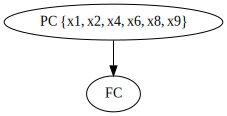

In [24]:
DHN.DrawGraph(morse_graph)

## Search for multi-stability

In [25]:
num_samples = 100

for par_index in random.sample(range(parameter_graph.size()), num_samples):
    parameter = parameter_graph.parameter(par_index)
    domain_graph = DHN.DomainGraph(parameter)
    morse_graph = DHN.MorseGraph(domain_graph)
    morse_nodes = range(morse_graph.poset().size())
    # Check if Morse node is stable
    stable = lambda node : len(morse_graph.poset().children(node)) == 0
    stable_nodes = [node for node in morse_nodes if stable(node)]
    if len(stable_nodes) > 1:
        print(par_index)

1412869777
956447149
47390927
1357718731
1629500919
974925978
3294892859
2073305011
1755234525
3326893547
2170100697
591202654
2942232094
1996733932
819339847
2512822795
663009178
784243017
1473841309
2312402672
1213829786
1748714747
708914549
2585378047
3288999541
3332793359
499158826
2473154265
3315394164
1887788487
1797586436
1395911306
2085834544
1727890658
100361706
1338594932
2380210682
175280357
1711663091
1341274744
1437862827
2162867220
209328903
1619622478


In [30]:
par_index = 47390927

parameter = parameter_graph.parameter(par_index)

In [31]:
domain_graph = DHN.DomainGraph(parameter)

In [32]:
morse_graph = DHN.MorseGraph(domain_graph)

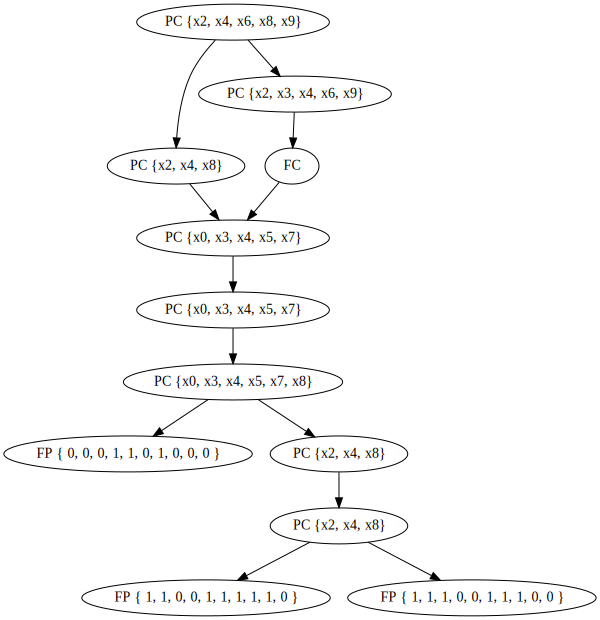

In [33]:
DHN.DrawGraph(morse_graph)